<a href="https://colab.research.google.com/github/FIKENYE/Personal-Projects/blob/main/LinRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install --upgrade pip # installs pip

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install yfinance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
#imports relevant libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# imports training functions from sk learn and linear regression model

In [ ]:
ticker = "GOOG"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
print(data.head()) # selects Tesla data from yahoo finance

/tmp/ipython-input-1755398106.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2020-01-02  67.903809  67.942045  66.621583  66.621583  28132000
2020-01-03  67.570595  68.158574  66.819933  66.934945  23728000
2020-01-06  69.236694  69.350410  67.041216  67.041216  34646000
2020-01-07  69.193489  69.672708  69.046492  69.421929  30054000
2020-01-08  69.738762  70.099294  69.069339  69.130914  30560000


In [ ]:
data.dropna(inplace = True) # cleans data

In [ ]:
print(data.head())

Price           Close       High        Low       Open    Volume
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG
Date                                                            
2020-01-02  67.903809  67.942045  66.621583  66.621583  28132000
2020-01-03  67.570595  68.158574  66.819933  66.934945  23728000
2020-01-06  69.236694  69.350410  67.041216  67.041216  34646000
2020-01-07  69.193489  69.672708  69.046492  69.421929  30054000
2020-01-08  69.738762  70.099294  69.069339  69.130914  30560000


In [ ]:
data["SMA_20"] = data["Close"].rolling(window=20).mean()
data["SMA_50"] = data["Close"].rolling(window=50).mean()

print(data.head())
# creates 20 day and 50 day moving averages

Price           Close       High        Low       Open    Volume SMA_20 SMA_50
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG              
Date                                                                          
2020-01-02  67.903809  67.942045  66.621583  66.621583  28132000    NaN    NaN
2020-01-03  67.570595  68.158574  66.819933  66.934945  23728000    NaN    NaN
2020-01-06  69.236694  69.350410  67.041216  67.041216  34646000    NaN    NaN
2020-01-07  69.193489  69.672708  69.046492  69.421929  30054000    NaN    NaN
2020-01-08  69.738762  70.099294  69.069339  69.130914  30560000    NaN    NaN


In [ ]:
data.dropna(inplace = True)
print(data.head())


Price           Close       High        Low       Open    Volume     SMA_20  \
Ticker           GOOG       GOOG       GOOG       GOOG      GOOG              
Date                                                                          
2020-03-13  60.571991  60.573480  55.477505  58.549333  74002000  67.566301   
2020-03-16  53.848003  57.221766  53.356865  54.427537  85048000  66.482691   
2020-03-17  55.609447  56.158686  52.441623  54.284015  77230000  65.489811   
2020-03-18  54.467266  54.948970  51.511491  52.466458  84668000  64.422391   
2020-03-19  55.385487  57.504981  52.645141  54.281045  73022000  63.422087   

Price          SMA_50  
Ticker                 
Date                   
2020-03-13  70.287306  
2020-03-16  70.006189  
2020-03-17  69.766966  
2020-03-18  69.471578  
2020-03-19  69.195418  


In [ ]:
X = data[["Open", "High", "Low", "Volume", "SMA_20", "SMA_50"]]
y = data["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


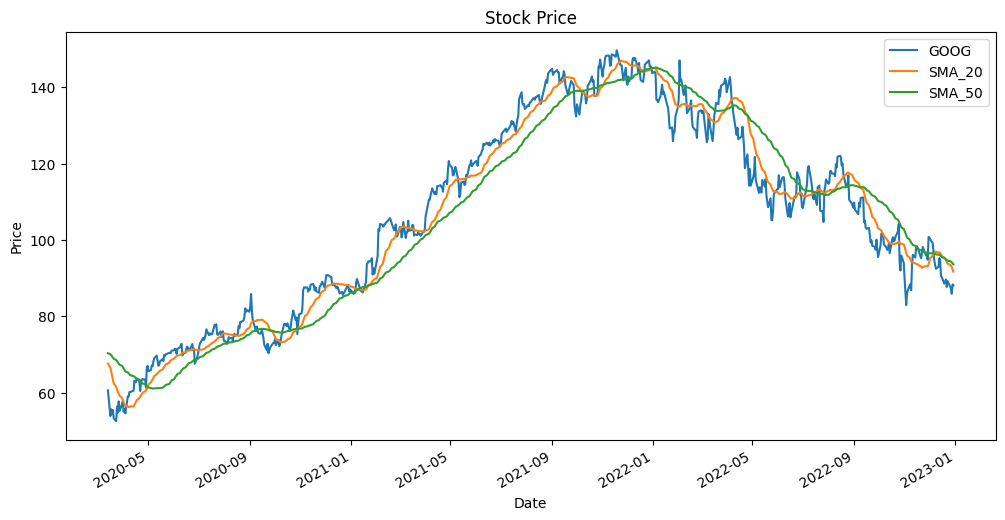

In [ ]:
data["Close"].plot(figsize=(12,6))
data["SMA_20"].plot(figsize=(12,6))
data["SMA_50"].plot(figsize=(12,6))
plt.legend()
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
X = data[["Open", "High", "Low", "Volume", "SMA_20", "SMA_50"]]
y = data["Close"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.43035629338184533
R-squared: 0.9993870651259975


In [ ]:
# 1. Identify the future date (replace with your desired date)
future_date = "2024-03-15" # Example future date

# 2. Gather/Estimate the input features for that date
# This is the crucial step where you need to get or estimate these values.
# For demonstration, let's use hypothetical values.
# In a real-world scenario, you might get this data from a financial API for a past date,
# or use more sophisticated forecasting techniques to estimate for a future date.
estimated_open = 175.00
estimated_high = 176.00
estimated_low = 174.00
estimated_volume = 1500000
estimated_sma_20 = 174.50  # Calculate or estimate based on preceding 'Close' prices
estimated_sma_50 = 173.80  # Calculate or estimate based on preceding 'Close' prices

# 3. Create a DataFrame for the future data
future_data_for_prediction = pd.DataFrame({
    "Open": [estimated_open],
    "High": [estimated_high],
    "Low": [estimated_low],
    "Volume": [estimated_volume],
    "SMA_20": [estimated_sma_20],
    "SMA_50": [estimated_sma_50]
})

# You can optionally set the index to the future date for clarity
future_data_for_prediction.index = pd.to_datetime([future_date])

# 4. Use the trained model to predict
future_prediction = model.predict(future_data_for_prediction)

# Print the prediction
print(f"Predicted price for {future_date}: {future_prediction[0]}")

Predicted price for 2024-03-15: [175.02760633]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


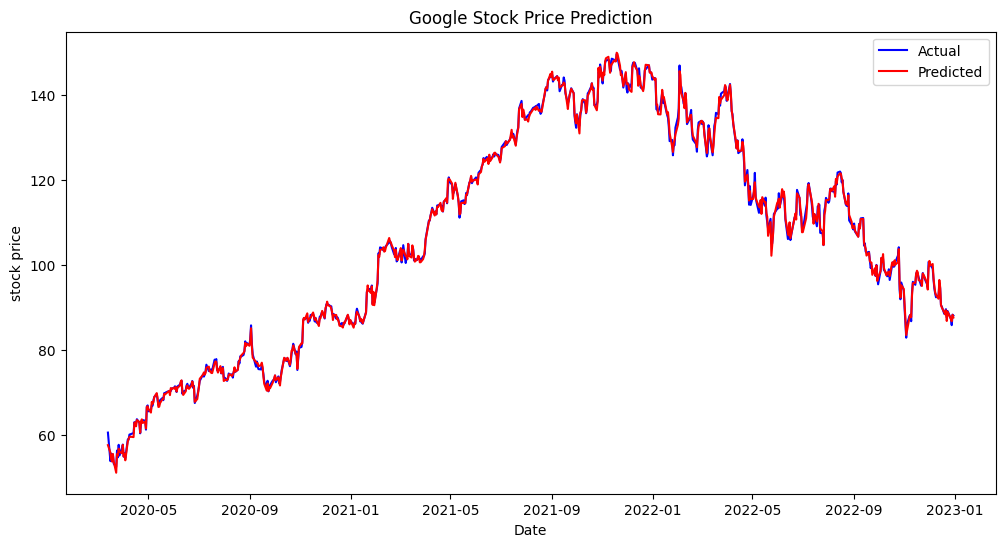

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Actual", color="blue")
plt.plot(data.index, model.predict(X), label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("stock price")
plt.title("Google Stock Price Prediction")
plt.legend()
plt.show()

In [ ]:
def signal_generator(actual_prices, predicted_prices):
    signals = pd.DataFrame(index=actual_prices.index)
    signals['Actual_Close'] = actual_prices
    signals['Predicted_Close'] = predicted_prices

    signals['Signal'] = 0.0
    signals.loc[signals.index[1:], "Signal"] = np.where(signals.loc[signals.index[1:], "Predicted_Close"] > signals['Actual_Close'].shift(1)[1:], 1.0, 0.0)

    signals['Positions'] = signals['Signal'].diff()

    buy_signals = signals.loc[signals['Positions'] == 1.0]
    sell_signals = signals.loc[signals['Positions'] == -1.0]

    return buy_signals, sell_signals

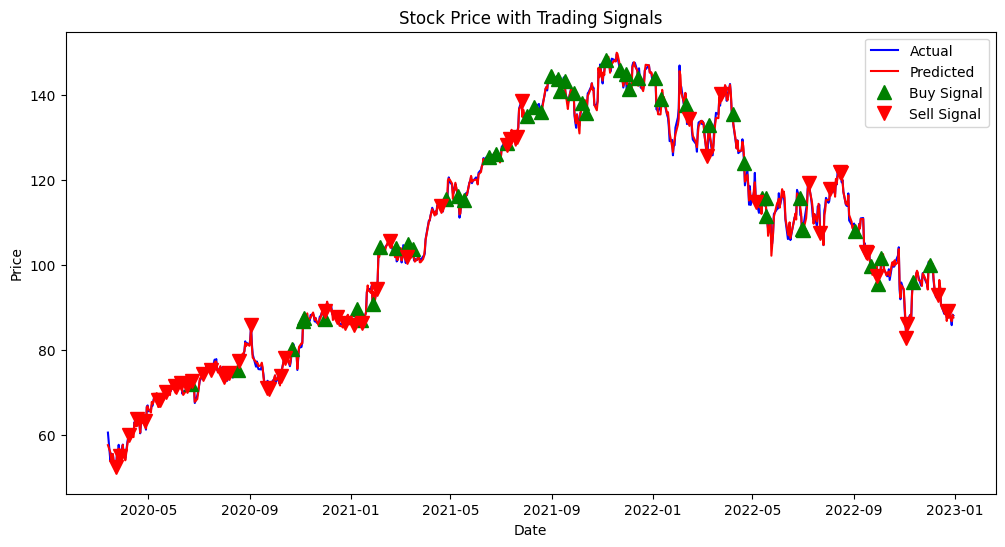

In [ ]:
buy_signals, sell_signals = signal_generator(y_test, y_pred)

plt.figure(figsize=(12, 6))

plt.plot(data.index, data["Close"], label="Actual", color="blue")
plt.plot(data.index, model.predict(X), label="Predicted", color="red")

plt.plot(buy_signals.index, buy_signals['Actual_Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(sell_signals.index, sell_signals['Actual_Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Stock Price with Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/tmp/ipython-input-1737123746.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  future_data_for_curve = yf.download(ticker, start=start_date_future, end=end_date_future)
[*********************100%***********************]  1 of 1 completed


Mean Squared Error (MSE): 0.49799897692628914
r2_score: 0.9969996922455956


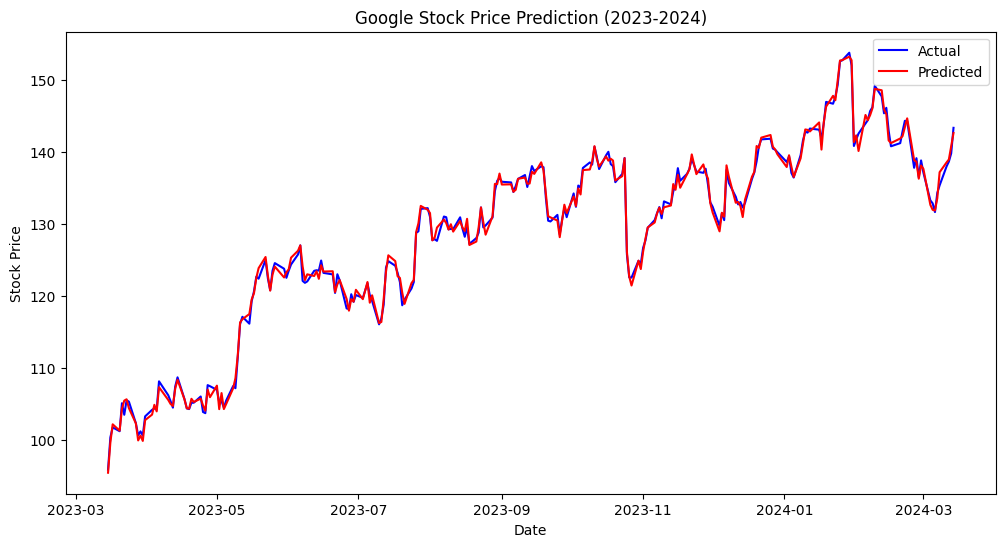

In [ ]:
ticker = "GOOG"  # Your chosen ticker
start_date_future = "2023-01-01"
end_date_future = "2024-03-15" # Replace with your desired end date

future_data_for_curve = yf.download(ticker, start=start_date_future, end=end_date_future)

# 2. Preprocess the data (same steps as your training data)
future_data_for_curve.dropna(inplace=True) # Clean data
future_data_for_curve["SMA_20"] = future_data_for_curve["Close"].rolling(window=20).mean()
future_data_for_curve["SMA_50"] = future_data_for_curve["Close"].rolling(window=50).mean()
future_data_for_curve.dropna(inplace=True) # Clean again after adding SMAs

# 3. Select the features for prediction
X_future = future_data_for_curve[["Open", "High", "Low", "Volume", "SMA_20", "SMA_50"]]

# 4. Make predictions using the trained model
predictions_future = model.predict(X_future)

#Score of the model
mse_future = mean_squared_error(future_data_for_curve["Close"], predictions_future)
r2_future = r2_score(future_data_for_curve["Close"], predictions_future)

print(f"Mean Squared Error (MSE): {mse_future}")
print(f"r2_score: {r2_future}")

# 5. Plot the actual and predicted prices
plt.figure(figsize=(12, 6))
plt.plot(future_data_for_curve.index, future_data_for_curve["Close"], label="Actual", color="blue")
plt.plot(future_data_for_curve.index, predictions_future, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Google Stock Price Prediction (2023-2024)")
plt.legend()
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    return np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100

def predict_and_compare_future(model, future_data, actual_future_prices=None):
    future_predictions = model.predict(future_data)
    prediction_results = pd.DataFrame(future_predictions, index=future_data.index, columns=['Predicted_Close'])
    if actual_future_prices is not None:
        prediction_results['Actual_Close'] = actual_future_prices
    return prediction_results

def signal_generator(actual_prices, predicted_prices):
    signals = pd.DataFrame(index=actual_prices.index)
    signals['Actual_Close'] = actual_prices
    signals['Predicted_Close'] = predicted_prices
    signals['Signal'] = 0.0
    signals.loc[signals.index[1:], "Signal"] = np.where(signals.loc[signals.index[1:], "Predicted_Close"] > signals['Actual_Close'].shift(1)[1:], 1.0, 0.0)
    signals['Positions'] = signals['Signal'].diff()
    buy_signals = signals.loc[signals['Positions'] == 1.0]
    sell_signals = signals.loc[signals['Positions'] == -1.0]
    return buy_signals, sell_signals

def calculate_average_return(actual_prices, buy_signals, sell_signals):
    returns = []
    for i in range(len(buy_signals)):
        buy_price = buy_signals.iloc[i]['Actual_Close']
        next_sell_signal = sell_signals[sell_signals.index > buy_signals.index[i]]
        if not next_sell_signal.empty:
            sell_price = next_sell_signal.iloc[0]['Actual_Close']
            trade_return = (sell_price - buy_price) / buy_price
            returns.append(trade_return)
        else:
            pass
    if not returns:
        return 0
    else:
        return sum(returns) / len(returns)

2023-2024 Prediction Results:
            Predicted_Close  Actual_Close
Date                                     
2023-03-15        95.469979     95.893784
2023-03-16        99.674468    100.383057
2023-03-17       102.192152    101.763611
2023-03-20       101.309890    101.237198
2023-03-21       104.348845    105.120628

2023-2024 Model Evaluation Metrics:
Mean Squared Error (MSE): 0.4980
Root Mean Squared Error (RMSE): 0.7057
R-squared (R²): 0.9970
Mean Absolute Percentage Error (MAPE): 0.44%

2023-2024 Average Return: 0.0053


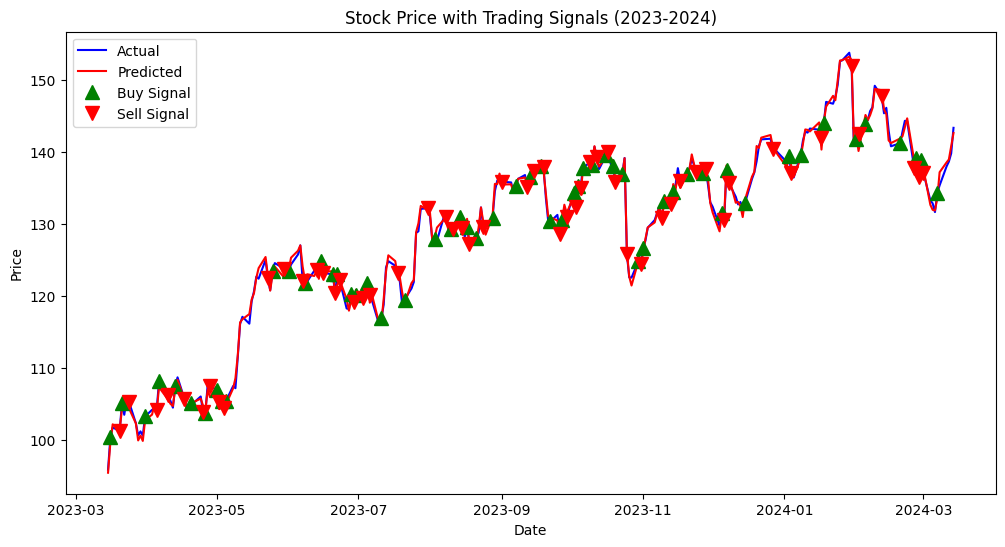

In [ ]:
# Assuming future_data_for_curve and predictions_future have been generated from the 2023-2024 data section

# Use the predict_and_compare_future function (optional, but good for organizing results)
future_prediction_results_2024 = predict_and_compare_future(model, X_future, future_data_for_curve["Close"])

# Print prediction results (optional)
print("2023-2024 Prediction Results:")
print(future_prediction_results_2024.head())

# Calculate accuracy metrics for the 2023-2024 predictions
actual_prices_2024 = future_data_for_curve["Close"]
predicted_prices_2024 = predictions_future

mse_2024 = mean_squared_error(actual_prices_2024, predicted_prices_2024)
rmse_2024 = np.sqrt(mse_2024)
r2_2024 = r2_score(actual_prices_2024, predicted_prices_2024)
mape_2024 = mean_absolute_percentage_error(actual_prices_2024, predicted_prices_2024)

print("\n2023-2024 Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_2024:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2024:.4f}")
print(f"R-squared (R²): {r2_2024:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_2024:.2f}%")

# Generate trading signals for the 2023-2024 data
buy_signals_2024, sell_signals_2024 = signal_generator(actual_prices_2024, predicted_prices_2024)

# Calculate the average return based on the signals for 2023-2024
average_return_2024 = calculate_average_return(actual_prices_2024, buy_signals_2024, sell_signals_2024)

print(f"\n2023-2024 Average Return: {average_return_2024:.4f}")

# Plot the actual prices, predicted prices, and trading signals for 2023-2024
plt.figure(figsize=(12, 6))
plt.plot(future_data_for_curve.index, actual_prices_2024, label="Actual", color="blue")
plt.plot(future_data_for_curve.index, predicted_prices_2024, label="Predicted", color="red")
plt.plot(buy_signals_2024.index, buy_signals_2024['Actual_Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.plot(sell_signals_2024.index, sell_signals_2024['Actual_Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Stock Price with Trading Signals (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
def calculate_total_return(actual_prices, buy_signals, sell_signals):
        returns = []
        for i in range(len(buy_signals)):
            buy_price = buy_signals.iloc[i]['Actual_Close']
            next_sell_signal = sell_signals[sell_signals.index > buy_signals.index[i]]
            if not next_sell_signal.empty:
                sell_price = next_sell_signal.iloc[0]['Actual_Close']
                trade_return = (sell_price - buy_price) / buy_price
                returns.append(trade_return)
            else:
                pass
        return sum(returns) if returns else 0 # Return sum if trades, otherwise 0

    # Example usage
total_return_2024 = calculate_total_return(actual_prices_2024, buy_signals_2024, sell_signals_2024)
print(f"2023-2024 Total Return: {total_return_2024:.4f}")

2023-2024 Total Return: 0.2954


In [ ]:
def analyze_trade_outcomes(actual_prices, buy_signals, sell_signals):
        profitable_trades = 0
        losing_trades = 0
        total_trades = 0

        for i in range(len(buy_signals)):
            buy_price = buy_signals.iloc[i]['Actual_Close']
            next_sell_signal = sell_signals[sell_signals.index > buy_signals.index[i]]
            if not next_sell_signal.empty:
                total_trades += 1
                sell_price = next_sell_signal.iloc[0]['Actual_Close']
                trade_return = (sell_price - buy_price) / buy_price
                if trade_return > 0:
                    profitable_trades += 1
                elif trade_return < 0:
                    losing_trades += 1

        if total_trades == 0:
            return 0, 0, 0, 0

        win_rate = (profitable_trades / total_trades) * 100
        loss_rate = (losing_trades / total_trades) * 100

        return profitable_trades, losing_trades, total_trades, win_rate

    # Example usage
profitable, losing, total, win_rate = analyze_trade_outcomes(actual_prices_2024, buy_signals_2024, sell_signals_2024)
print(f"\nTrade Outcomes (2023-2024):")
print(f"Profitable Trades: {profitable}")
print(f"Losing Trades: {losing}")
print(f"Total Completed Trades: {total}")
print(f"Win Rate: {win_rate:.2f}%")


Trade Outcomes (2023-2024):
Profitable Trades: 26
Losing Trades: 30
Total Completed Trades: 56
Win Rate: 46.43%



2023-2024 Average Return (Improved Signal): 0.0199
2023-2024 Total Return (Improved Signal): 0.6774

Trade Outcomes (2023-2024, Improved Signal):
Profitable Trades: 19
Losing Trades: 15
Total Completed Trades: 34
Win Rate: 55.88%


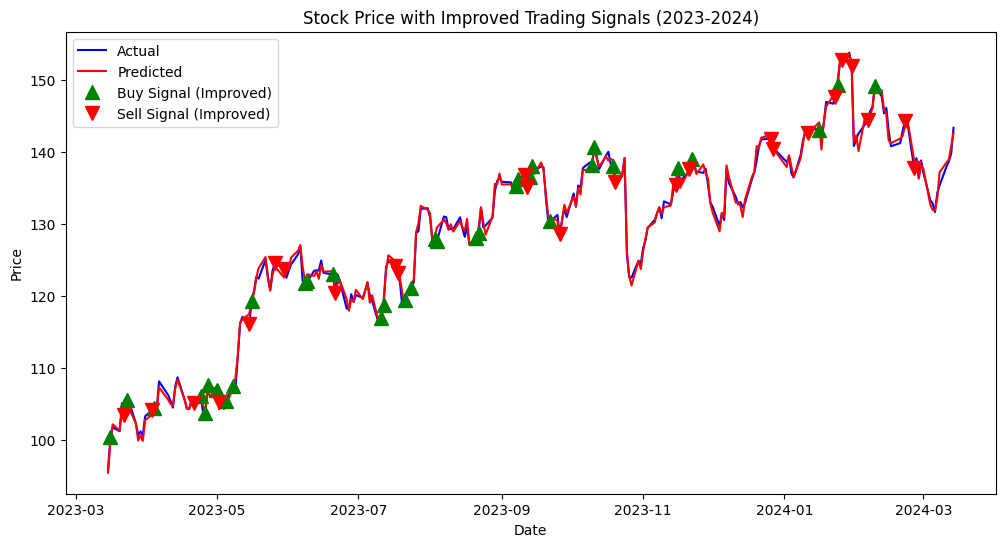

In [ ]:
# prompt: create a better buy/signal algorithm

def improved_signal_generator(actual_prices, predicted_prices, threshold=0.01):
    """
    Generates buy/sell signals with an added threshold for prediction confidence.

    Args:
        actual_prices (pd.Series): Series of actual closing prices.
        predicted_prices (pd.Series): Series of predicted closing prices.
        threshold (float): The percentage increase in predicted price relative
                           to the previous actual close required to trigger a buy signal.

    Returns:
        tuple: (buy_signals_df, sell_signals_df)
    """
    signals = pd.DataFrame(index=actual_prices.index)
    signals['Actual_Close'] = actual_prices
    signals['Predicted_Close'] = predicted_prices

    signals['Signal'] = 0.0

    # Calculate the required predicted price increase based on the threshold
    required_predicted_price = signals['Actual_Close'].shift(1) * (1 + threshold)

    # Generate buy signals: predicted price is significantly higher than the previous actual close
    signals.loc[signals.index[1:], "Signal"] = np.where(
        signals.loc[signals.index[1:], "Predicted_Close"] > required_predicted_price[1:], 1.0, 0.0
    )

    # Generate sell signals: predicted price is significantly lower than the previous actual close
    # or using a different condition (e.g., predicted price drops below SMA or a fixed percentage)
    # For simplicity, let's use a simple sell signal when the predicted price is lower than the actual close
    # This can be further refined.
    signals.loc[signals.index[1:], "Signal"] = np.where(
        signals.loc[signals.index[1:], "Predicted_Close"] < signals['Actual_Close'].shift(1)[1:], -1.0, signals['Signal'][1:]
    )

    signals['Positions'] = signals['Signal'].diff()

    buy_signals = signals.loc[signals['Positions'] == 1.0]
    sell_signals = signals.loc[signals['Positions'] == -1.0]

    return buy_signals, sell_signals

# Example usage with the improved signal generator on the 2023-2024 data:
buy_signals_improved, sell_signals_improved = improved_signal_generator(actual_prices_2024, predicted_prices_2024, threshold=0.005) # Adjust threshold as needed

# Calculate the average return based on the improved signals for 2023-2024
average_return_improved = calculate_average_return(actual_prices_2024, buy_signals_improved, sell_signals_improved)

print(f"\n2023-2024 Average Return (Improved Signal): {average_return_improved:.4f}")

# Calculate the total return based on the improved signals for 2023-2024
total_return_improved = calculate_total_return(actual_prices_2024, buy_signals_improved, sell_signals_improved)
print(f"2023-2024 Total Return (Improved Signal): {total_return_improved:.4f}")

# Analyze trade outcomes with the improved signals
profitable_improved, losing_improved, total_improved, win_rate_improved = analyze_trade_outcomes(actual_prices_2024, buy_signals_improved, sell_signals_improved)
print(f"\nTrade Outcomes (2023-2024, Improved Signal):")
print(f"Profitable Trades: {profitable_improved}")
print(f"Losing Trades: {losing_improved}")
print(f"Total Completed Trades: {total_improved}")
print(f"Win Rate: {win_rate_improved:.2f}%")

# Plot the actual prices, predicted prices, and improved trading signals for 2023-2024
plt.figure(figsize=(12, 6))
plt.plot(future_data_for_curve.index, actual_prices_2024, label="Actual", color="blue")
plt.plot(future_data_for_curve.index, predicted_prices_2024, label="Predicted", color="red")
plt.plot(buy_signals_improved.index, buy_signals_improved['Actual_Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal (Improved)')
plt.plot(sell_signals_improved.index, sell_signals_improved['Actual_Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal (Improved)')
plt.title('Stock Price with Improved Trading Signals (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()



2023-2024 Average Return (Even Better Signal): 0.0110
2023-2024 Total Return (Even Better Signal): 0.7385

Trade Outcomes (2023-2024, Even Better Signal):
Profitable Trades: 35
Losing Trades: 32
Total Completed Trades: 67
Win Rate: 52.24%


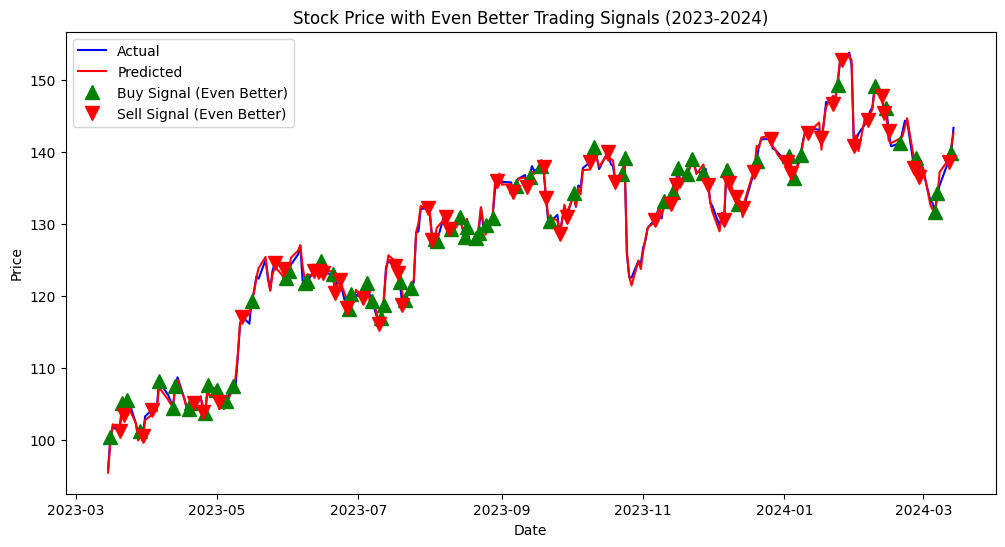

In [ ]:
# prompt: create an even better algorithm

def even_better_signal_generator(actual_prices, predicted_prices, buy_threshold=0.005, sell_threshold=-0.005):
    """
    Generates buy/sell signals with customizable buy and sell thresholds based on
    the predicted percentage change from the previous day's actual close.

    Args:
        actual_prices (pd.Series): Series of actual closing prices.
        predicted_prices (pd.Series): Series of predicted closing prices.
        buy_threshold (float): The percentage increase in predicted price relative
                               to the previous actual close required to trigger a buy signal.
                               e.g., 0.01 for a 1% increase.
        sell_threshold (float): The percentage decrease in predicted price relative
                                to the previous actual close required to trigger a sell signal.
                                e.g., -0.01 for a 1% decrease.

    Returns:
        tuple: (buy_signals_df, sell_signals_df)
    """
    signals = pd.DataFrame(index=actual_prices.index)
    signals['Actual_Close'] = actual_prices
    signals['Predicted_Close'] = predicted_prices

    signals['Signal'] = 0.0

    # Calculate the predicted percentage change from the previous actual close
    predicted_price_change_percentage = (signals['Predicted_Close'] - signals['Actual_Close'].shift(1)) / signals['Actual_Close'].shift(1)

    # Generate buy signals
    signals.loc[signals.index[1:], "Signal"] = np.where(
        predicted_price_change_percentage[1:] > buy_threshold, 1.0, 0.0
    )

    # Generate sell signals
    signals.loc[signals.index[1:], "Signal"] = np.where(
        predicted_price_change_percentage[1:] < sell_threshold, -1.0, signals['Signal'][1:]
    )

    signals['Positions'] = signals['Signal'].diff()

    # Filter out consecutive buy or sell signals
    buy_signals = signals.loc[signals['Positions'] == 1.0]
    sell_signals = signals.loc[signals['Positions'] == -1.0]

    return buy_signals, sell_signals

# Example usage with the even better signal generator on the 2023-2024 data:
# You can tune these thresholds to find optimal performance
buy_signals_even_better, sell_signals_even_better = even_better_signal_generator(actual_prices_2024, predicted_prices_2024, buy_threshold=0.008, sell_threshold=-0.008)

# Calculate the average return based on the even better signals for 2023-2024
average_return_even_better = calculate_average_return(actual_prices_2024, buy_signals_even_better, sell_signals_even_better)

print(f"\n2023-2024 Average Return (Even Better Signal): {average_return_even_better:.4f}")

# Calculate the total return based on the even better signals for 2023-2024
total_return_even_better = calculate_total_return(actual_prices_2024, buy_signals_even_better, sell_signals_even_better)
print(f"2023-2024 Total Return (Even Better Signal): {total_return_even_better:.4f}")

# Analyze trade outcomes with the even better signals
profitable_even_better, losing_even_better, total_even_better, win_rate_even_better = analyze_trade_outcomes(actual_prices_2024, buy_signals_even_better, sell_signals_even_better)
print(f"\nTrade Outcomes (2023-2024, Even Better Signal):")
print(f"Profitable Trades: {profitable_even_better}")
print(f"Losing Trades: {losing_even_better}")
print(f"Total Completed Trades: {total_even_better}")
print(f"Win Rate: {win_rate_even_better:.2f}%")

# Plot the actual prices, predicted prices, and even better trading signals for 2023-2024
plt.figure(figsize=(12, 6))
plt.plot(future_data_for_curve.index, actual_prices_2024, label="Actual", color="blue")
plt.plot(future_data_for_curve.index, predicted_prices_2024, label="Predicted", color="red")
plt.plot(buy_signals_even_better.index, buy_signals_even_better['Actual_Close'], '^', markersize=10, color='g', lw=0, label='Buy Signal (Even Better)')
plt.plot(sell_signals_even_better.index, sell_signals_even_better['Actual_Close'], 'v', markersize=10, color='r', lw=0, label='Sell Signal (Even Better)')
plt.title('Stock Price with Even Better Trading Signals (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
